# Analysing the Adverting Dataset with Linear Regression

In this notebook, we will explore the Advertising dataset, which contains information on advertising expenditures across three different media:

- **TV:** The amount spent on television advertising (in thousands of dollars).
- **Radio:** The amount spent on radio advertising (in thousands of dollars).
- **Newspaper:** The amount spent on newspaper advertising (in thousands of dollars).
- **Sales:** The number of units sold (in thousands).  

Our goal is to understand the relationship between advertising spending and sales. Specifically, we want to determine how well we can predict sales based on the amount spent on different advertising channels.  

We will start by fitting separate simple linear regression models for each advertising medium (TV, Radio, and Newspaper) to predict sales.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [4]:
# Importing the dataset
df = pd.read_csv("Advertising.csv", index_col=0)
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


## Training and Testing Data

When fitting Machine Learning models, we split our dataset into training and testing sets. The model learns from the training data, then we use the testing data to evaluate our model's performance on data it has not seen.

In [5]:
# Inputs
X = df[['TV', 'Radio', 'Newspaper']]

# Outputs
y = df['Sales']

X.shape, y.shape

((200, 3), (200,))

In [6]:
# Splitting dataset: 80% for taining, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## TV Simple Linear Model

We will start with fitting a model using the TV expenditure as a predictor of sales.

In [7]:
# Training and testing inputs for TV model
X_train_tv = X_train[['TV']]
X_test_tv = X_test[['TV']]

In [11]:
# Create an empty linear regression model
tv_model = LinearRegression()

# To create the model, we use fit(x,y)
tv_model.fit(X_train_tv, y_train)

LinearRegression()

Now, we will visualise our model by plotting the line of best fit alongside a scatterplot of the observed sales values against TV advertising expenditures. This will help us see how well the model captures the relationship between TV spending and sales.

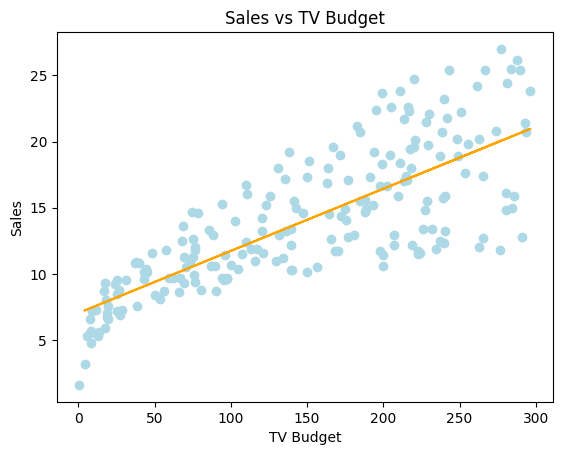

In [12]:
# Model's predictions on training data
y_pred_tv = tv_model.predict(X_train_tv)

# Scatterplot of sales vs TV budget using original data points (entire dataset)
plt.scatter(df[['TV']], y, color = 'lightblue')

# Line of best fit plot
plt.plot(X_train_tv, y_pred_tv, color = 'orange')

plt.title('Sales vs TV Budget')
plt.xlabel('TV Budget')
plt.ylabel('Sales')
plt.show()


We can see, visually, that there is a linear relationship between TV budget expenditure and sales. Our line of best fit captures this relationship well. Now, we would like to evaluate the performance of our model to assess how good a predictor the TV budget is for sales.

In [13]:
# Model's predictions on testing data
y_test_pred_tv = tv_model.predict(X_test_tv)

# Calculate R-squared score
r2 = r2_score(y_test, y_test_pred_tv)

print(f"R-squared score: {r2}")

R-squared score: 0.595061731517883


A score of 0.5847 means that about 58.5% of the variance in the slaes can be explained by your model using the TV budget expenditure as a predictor. Remember, when interpretting R-squared:

- 0.0 indicates that the model explains none of the variance.
- 1.0 indicates that the model perfectly explains the variance in the data.  


A score of 0.5847 suggests that our model has a decent fit, but there's still room for improvement. The model is capturing a fair amount of the relationship, but it's clear other factors are be influencing sales (such as the other advertersing mediums).

## Radio Simple Linear Model

In [14]:
# Training and testing inputs for Radio model
X_train_radio = X_train[['Radio']]
X_test_radio = X_test[['Radio']]

In [15]:
# Create an empty linear regression model
radio_model = LinearRegression()

# To create the model, we use fit(x,y)
radio_model.fit(X_train_radio, y_train)


LinearRegression()

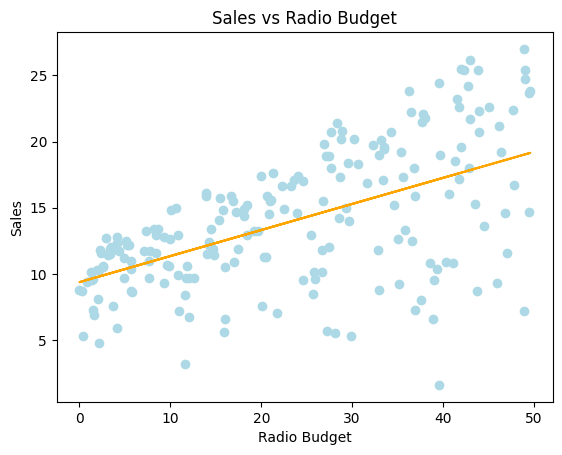

In [16]:
# Model's predictions on training data
y_pred_radio = radio_model.predict(X_train_radio)

# Scatterplot of sales vs radio budget using original data points (entire dataset)
plt.scatter(df[['Radio']], y, color = 'lightblue')

# Line of best fit plot
plt.plot(X_train_radio, y_pred_radio, color = 'orange')

plt.title('Sales vs Radio Budget')
plt.xlabel('Radio Budget')
plt.ylabel('Sales')
plt.show()


In [17]:
# Model's predictions on testing data
y_test_pred_radio = radio_model.predict(X_test_radio)

# Calculate R-squared score
r2 = r2_score(y_test, y_test_pred_radio)

print(f"R-squared score: {r2}")

R-squared score: 0.32094835613369477


Let us dive into the mathematics. Remember, the linear regression model we have built is based on the equation of a straight line: **y = mx + c**. We can obtain the slope and coefficient values of our model.

In [18]:
print('Coefficients: \n', radio_model.coef_)
print('Intercept: \n', radio_model.intercept_)

Coefficients: 
 [0.19706368]
Intercept: 
 9.369733490091573


Given the above values, our line of best fit can be expressed as:  

<center>
Sales = 0.19830476 radio_budget + 9.401230710449518  
</center>

So, if we invest \$10,000 dollars into the radio advertising budget, we predict sales to be:

<center>
Sales = 0.19830476 (10) + 9.401230710449518 = 11.3842783104  
</center>

That is about 11,300 units sold.  The coefficient value tells us how much we expect the sales to increase by for every unit increase in the radio budget. Say, we increased the budget from \$10,000 to $11,000 (a one-unit increase):

<center>
Sales = 0.19830476 (11) + 9.401230710449518 = 11.5825830704  
</center>

The sales would increase to almost 11,600 sold. Let us look at the difference in the sales we expect given the two budget expenditures:  

<center>
Difference in sales = 11.5825830704 - 11.3842783104 = 0.19830476  
</center>

So, for every additional $1000 (unit) invested in radio advertisements, sales are predicted to go up by 198 units (0.19830476 as indicated by the coefficient).


**Important note:** Re-running the code cells may result in different slope and coefficient values, as the training and testing sets will change due to the randomisation in the splitting process.


## Newspaper Simple Linear model

In [19]:
# Training and testing inputs for Newspaper model
X_train_newspaper = X_train[['Newspaper']]
X_test_newspaper = X_test[['Newspaper']]

In [20]:
# Create an empty linear regression model
newspaper_model = LinearRegression()

# To create the model, we use fit(x,y)
newspaper_model.fit(X_train_newspaper, y_train)



LinearRegression()

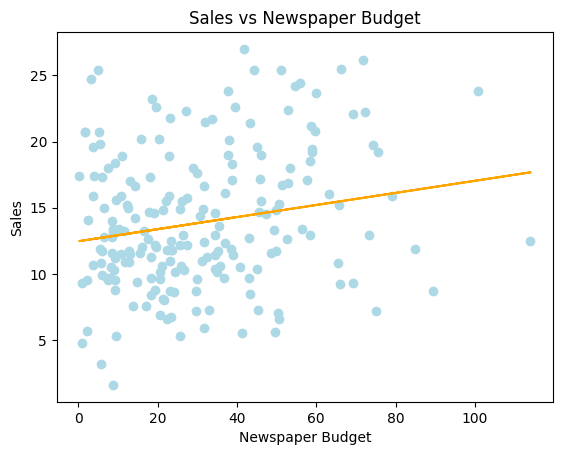

In [ ]:
# Model's predictions on training data
y_pred_newspaper = newspaper_model.predict(X_train_newspaper)

# Scatterplot of sales vs radio budget using original data points (entire dataset)
plt.scatter(df[['Newspaper']], y, color = 'lightblue')

# Line of best fit plot
plt.plot(X_train_newspaper, y_pred_newspaper, color = 'orange')

plt.title('Sales vs Newspaper Budget')
plt.xlabel('Newspaper Budget')
plt.ylabel('Sales')
plt.show()


In [ ]:
# Model's predictions on testing data
y_test_pred_newspaper = newspaper_model.predict(X_test_newspaper)

# Calculate R-squared score
r2 = r2_score(y_test, y_test_pred_newspaper)

print(f"R-squared score: {r2}")

R-squared score: 0.0765315763164579


## Comparing Models

To conclude, visually, the TV model showed the strongest linear relationship with sales, while the newspaper model had the weakest. The TV model also had the highest R-squared score, while the newspaper model had the lowest. This suggests that TV is the best predictor of sales. However, by combining all three predictors, we could create an even more powerful model using **multiple linear regression**.


## Multiple Linear Regression

In [ ]:
# Initialise and fit the Multiple Linear Regression model
mlr = LinearRegression()
mlr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = mlr.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2}")

R-squared score: 0.9143675742102524


An R-squared value of 0.9144 means that around 91.4% of the variance in sales is explained by the model using all three predictors (TV, Radio, and Newspaper). This is a strong result, indicating that the MLR model is very effective at predicting sales. This score is also significantly higher than the R-squared values from the three individual simple linear regression models. They were likely lower since they only considered one predictor at a time.  

By combining all three predictors, the MLR model captures more of the data's variance, leading to a much better fit and stronger predictive power.